# Installing and Running Jupyter

Jupyter is an "interactive computational environment". If you've used the interactive prompt—"REPL"—for Python or Ruby (or Haskell, or Java 9, etc.), you'll be familiar with the essential concept: you run code and immediately see the results. You define functions and call them, define variables and manipulate them. It's a good way to explore and problem solve using code.

Jupyter enhances the experience in a couple ways. 

First, it allows you to interleave descriptive text with your code. You can explain your motivation, reasoning, and challenges. With Markdown, you can add styling, images, and links.  

And second, used correctly, it generates a record of your work and of the steps you took to produce your results. You can export it to HTML, PDF (with Pandoc), and other formats. GitHub even renders Jupyter Notebook files directly!

## Anaconda (option 1)

The simplest way to install Jupyter is to download [Anaconda](https://www.anaconda.com/download/) and run the Python 3.6 installer for your platform. Anaconda combines several useful tools, including the `conda` virtual environment tool, but please note that as a result, **it is a very large download**.

## Docker (option 2)

If you have [Docker](https://www.docker.com) installed, you can run Jupyter inside a container by running:

```sh
mkdir ~/JupyterNotebook/
docker run --publish 8888:8888 -v ~/JupyterNotebook/:/home/jovyan/data jupyter/datascience-notebook
```

If you have never run this command before, Docker will pull the `jupyter/datascience-notebook` image from [Docker Hub](https://hub.docker.com) before running it.

In the command output, you should eventually see a line like this:

```
The Jupyter Notebook is running at: http://localhost:8888/?token=85f5aa1f59d5865f8b6443ba879bc17c8a1b42469f1f0f34
```

Copy and paste the URL into a browser. The contents of your `JupyterNotebook` directory will be displayed.

A full discussion of Docker is outside the scope of this tutorial.

## Alternatives

I'm not going to cover the alternative installation methods here, but if you choose to install using `pip`, I strongly encourage you to do so in a virtual environment.

# Introduction to Jupyter.

The workspace in Jupyter is called a **notebook** file. It uses the `.ipynb` file extension (so named for IPython, the antecedent of Jupyter).

Notebooks are organized into **cells**, small units of Markdown text or code that you can modify and execute individually. The code runs inside a kernel (typically Python, but you can install kernels for [many languages](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)). Your running notebooks are isolated from each other, so variables defined in one are not accessible in other notebooks, but cells are *not isolated*. This may seem obvious, but it's worth keeping in mind.

To "run" a cell, click inside it and press Ctrl+Return. To run a cell and insert a new one below, press Alt+Return (Option+Return). By default, new cells are Code cells. Use the drop down menu below Jupyter's menu bar to change it to Markdown or NBConvert.

# Pandas
We will use the Pandas library to import and manipulate the dataset. Pandas supplies us with a frankly daunting number of tools for data analysis, of which we'll use just a handful. See the [API Reference](http://pandas.pydata.org/pandas-docs/stable/api.html) for more.

If you used Anaconda to start Jupyter, pandas will already be installed.

Let's import it:

In [28]:
import pandas as pd

# Loading Data

On Socrata, we can get the API URL for any open data set by clicking on the API link at the top of the page:

![Location of the API link](./api_link.png)

And then clicking "Copy". CSV and JSON are both suitable formats for our purposes.

![Copy the API URL](./access_via_api.png)

Pandas provides several convenience methods for importing data from common formats, including CSV, JSON, and SQL. It can read from file objects, local file paths, database URIs, and URLs. We're going to use a URL:

In [49]:
datasets = pd.read_json("https://data.cambridgema.gov/resource/nkb2-a67x.json")
datasets

,api_endpoint,dataset_name,keywords,problem_statements_related_to_this_data,url
0,https://data.cambridgema.gov/resource/mh73-gji...,Sanitary Violations (105 CMR 590.000),"sanitary,sanitary inspections,restaurant inspe...",How can Cambridge better utilize and present t...,https://data.cambridgema.gov/d/mh73-gjid
1,https://data.cambridgema.gov/resource/2z9k-mv9...,Commonwealth Connect Service Requests,"311,public works,seeclickfix,pothole,snow,streets",How are requests distributed across the city? ...,https://data.cambridgema.gov/d/2z9k-mv9g
2,https://data.cambridgema.gov/resource/m5zs-2fu...,Cambridge Municipal Greenhouse Gas Inventory 2...,"greenhouse gas,ghg,environment,sustainability,...",How can Cambridge mitigate greenhouse gas emis...,https://data.cambridgema.gov/d/m5zs-2fuf
3,https://data.cambridgema.gov/resource/72g6-j7a...,2016 Cambridge Building Energy and Water Use D...,"building energy,energy disclosure,benchmarking...",Use this dataset to better understand energy a...,https://data.cambridgema.gov/d/72g6-j7aq
4,https://data.cambridgema.gov/resource/gb5w-yva...,Police Department Crash Data - Updated,"crash,accident,motor vehicles",What are the significant trends in Cambridge c...,https://data.cambridgema.gov/d/gb5w-yva3
5,https://data.cambridgema.gov/resource/ibuz-brb...,Customer Intercept Survey Results,"customers,commercial districts,economic develo...",What economic development improvements do thes...,https://data.cambridgema.gov/d/ibuz-brbz
6,https://data.cambridgema.gov/resource/54vd-wdq...,Participatory Budgeting Ideas Submitted by Com...,"finance,budget,participatory,public,community,...",What issues do people care about in the commun...,https://data.cambridgema.gov/d/54vd-wdqj
7,https://data.cambridgema.gov/resource/xd4d-326...,Early Voting for 2016 Presidential Election,"poll,vote,voting,election",How can Cambridge better educate residents abo...,https://data.cambridgema.gov/d/xd4d-326b
8,https://data.cambridgema.gov/resource/wrqt-2qw...,Cambridge Arts Grants 2007-Present,"grants,visual,art,dance,music,theater,literatu...",How can Cambridge better support the performin...,https://data.cambridgema.gov/d/wrqt-2qw9
9,https://data.cambridgema.gov/resource/x55n-q9y...,Cambridge Arts Street Performer Permits 2000-P...,"perform,art,music,busking,entertain",How can Cambridge better support the performin...,https://data.cambridgema.gov/d/x55n-q9yc


In [51]:
keywords = datasets.keywords.str.split(",")
keywords

0     [sanitary, sanitary inspections, restaurant in...
1     [311, public works, seeclickfix, pothole, snow...
2     [greenhouse gas, ghg, environment, sustainabil...
3     [building energy, energy disclosure, benchmark...
4                     [crash, accident, motor vehicles]
5     [customers, commercial districts, economic dev...
6     [finance, budget, participatory, public, commu...
7                        [poll, vote, voting, election]
8     [grants, visual, art, dance, music, theater, l...
9             [perform, art, music, busking, entertain]
10        [civic, innovation, hacking, volunteer, data]
11            [election, poll, vote, citizen, campaign]
12            [vote, turnout, election, campaign, poll]
13    [engagement, citywide planning, citizen partic...
14    [city of cambridge, traffic counts, adt, peak ...
15    [bza, zoning, requests, variance, special perm...
16    [building, permit, inspection, construction, h...
17    [development, projects, units, gfa, hotel 

In [7]:
# column_data = data["meta"]["view"]["columns"]
# columns = [c["fieldName"] for c in column_data]
# df = pd.DataFrame(data=np.array(data["data"]), columns=columns)
permits = pd.read_json("https://data.somervillema.gov/resource/q3yh-mp87.json")

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
0,23 MOUNT VERNON ST,100.0,granville newton,23mount vernon street,somerville ma 02145,2017-09-11T00:00:00,NaN,NaN,17-016797,2017-09-11T00:00:00,42.385448,-71.079521,DP17-000178,100.0,Dumpster Permit,Dumpster,dumpster on the street,Issued
1,46 WARE ST,100.0,Steven Hiou,2 Neptune Rd #140,East Boston MA 02151,2017-09-11T00:00:00,NaN,NaN,17-016869,2017-09-11T00:00:00,42.405514,-71.128281,DP17-000179,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
2,10 MONTGOMERY AVE,60.0,"Aquaflow plumbing and heating, inc",11 golden hills rd,"saugus, ma, 01906",2017-09-08T00:00:00,NaN,2018-03-08T00:00:00,17-016663,2017-09-08T00:00:00,42.390377,-71.090111,P17-000812,60.0,Residential - Existing,Plumbing,Sink Removal Basement,Issued
3,17 GORHAM ST,135.0,Keith Bryant,281 Payson Road,Belmont MA 02478,2017-09-08T00:00:00,NaN,2018-03-11T00:00:00,17-016664,2017-09-11T00:00:00,42.399414,-71.125687,E17-001825,135.0,Residential,Electrical,demo permit,Issued
4,81 SACRAMENTO ST,60.0,Pavidis Plumbing & Heating Inc.,24 Cross St,Somerville MA 02145,2017-09-08T00:00:00,NaN,2018-03-08T00:00:00,17-016666,2017-09-08T00:00:00,42.383160,-71.112610,G17-000647,60.0,Residential - Existing,Gas,Kitchen gas stove,Issued


Use the `head()` method to preview the structure of the data: view the columns, etc.

In [9]:
permits.head()

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
0,23 MOUNT VERNON ST,100.0,granville newton,23mount vernon street,somerville ma 02145,2017-09-11T00:00:00,NaN,NaN,17-016797,2017-09-11T00:00:00,42.385448,-71.079521,DP17-000178,100.0,Dumpster Permit,Dumpster,dumpster on the street,Issued
1,46 WARE ST,100.0,Steven Hiou,2 Neptune Rd #140,East Boston MA 02151,2017-09-11T00:00:00,NaN,NaN,17-016869,2017-09-11T00:00:00,42.405514,-71.128281,DP17-000179,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
2,10 MONTGOMERY AVE,60.0,"Aquaflow plumbing and heating, inc",11 golden hills rd,"saugus, ma, 01906",2017-09-08T00:00:00,NaN,2018-03-08T00:00:00,17-016663,2017-09-08T00:00:00,42.390377,-71.090111,P17-000812,60.0,Residential - Existing,Plumbing,Sink Removal Basement,Issued
3,17 GORHAM ST,135.0,Keith Bryant,281 Payson Road,Belmont MA 02478,2017-09-08T00:00:00,NaN,2018-03-11T00:00:00,17-016664,2017-09-11T00:00:00,42.399414,-71.125687,E17-001825,135.0,Residential,Electrical,demo permit,Issued
4,81 SACRAMENTO ST,60.0,Pavidis Plumbing & Heating Inc.,24 Cross St,Somerville MA 02145,2017-09-08T00:00:00,NaN,2018-03-08T00:00:00,17-016666,2017-09-08T00:00:00,42.383160,-71.112610,G17-000647,60.0,Residential - Existing,Gas,Kitchen gas stove,Issued


Because we read the data from JSON, which has no standard datetime type, we need to convert the `applicationdate` and `expirationdate` columns to datetimes.

In [11]:
permits[["applicationdate"]] = pd.to_datetime(permits["applicationdate"])
permits[["expirationdate"]] = pd.to_datetime(permits["expirationdate"])

There are a few ways to filter the data.

In [7]:
permits[permits.applicationdate >= datetime(2017, 5, 2)]

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
0,23 MOUNT VERNON ST,100.0,granville newton,23mount vernon street,somerville ma 02145,2017-09-11,NaN,NaT,17-016797,2017-09-11T00:00:00,42.385448,-71.079521,DP17-000178,100.0,Dumpster Permit,Dumpster,dumpster on the street,Issued
1,46 WARE ST,100.0,Steven Hiou,2 Neptune Rd #140,East Boston MA 02151,2017-09-11,NaN,NaT,17-016869,2017-09-11T00:00:00,42.405514,-71.128281,DP17-000179,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
2,10 MONTGOMERY AVE,60.0,"Aquaflow plumbing and heating, inc",11 golden hills rd,"saugus, ma, 01906",2017-09-08,NaN,2018-03-08,17-016663,2017-09-08T00:00:00,42.390377,-71.090111,P17-000812,60.0,Residential - Existing,Plumbing,Sink Removal Basement,Issued
3,17 GORHAM ST,135.0,Keith Bryant,281 Payson Road,Belmont MA 02478,2017-09-08,NaN,2018-03-11,17-016664,2017-09-11T00:00:00,42.399414,-71.125687,E17-001825,135.0,Residential,Electrical,demo permit,Issued
4,81 SACRAMENTO ST,60.0,Pavidis Plumbing & Heating Inc.,24 Cross St,Somerville MA 02145,2017-09-08,NaN,2018-03-08,17-016666,2017-09-08T00:00:00,42.383160,-71.112610,G17-000647,60.0,Residential - Existing,Gas,Kitchen gas stove,Issued
5,430 MCGRATH HWY,60.0,Atlas Glen-mor,295 Eastern Ave,Chelsea MA 02150,2017-09-08,NaN,2018-03-11,17-016682,2017-09-11T00:00:00,42.382835,-71.091286,E17-001830,60.0,Residential,Electrical,Wire replacement oil boiler,Issued
6,105 BROADWAY,100.0,Rent-A-Center,105 Broadway,Somerville MA 02145,2017-09-08,NaN,NaT,17-016685,2017-09-08T00:00:00,42.387558,-71.083168,DP17-000177,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
7,28 CROSS ST,155.0,Lindquist Electric Inc,64 Williams St,Upton MA 01568,2017-09-07,NaN,2018-03-08,17-016543,2017-09-08T00:00:00,42.389565,-71.085228,E17-001818,155.0,Commercial,Electrical,"Demolition/Make safe, Provide temp power for d...",Issued
8,28 HAWTHORNE ST,304.0,David Martin HVAC,144 Pond St.,Stoneham MA 02180,2017-09-07,NaN,2018-03-11,17-016552,2017-09-11T00:00:00,42.393784,-71.117958,SM17-000199,304.0,Residential,Sheet Metal,installation of new duct work,Issued
9,147 GLEN ST,160.0,Gonzalo Artigas,26 Vineyard St,Cambridge MA 02138,2017-09-07,NaN,2018-03-08,17-016554,2017-09-08T00:00:00,42.382938,-71.087631,P17-000811,160.0,Residential - Existing,Plumbing,"Demo kitchen, demo 2 bathrooms, rough and fini...",Issued


In [10]:
permits[permits.amountpaid >= 100]

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
0,23 MOUNT VERNON ST,100.0,granville newton,23mount vernon street,somerville ma 02145,2017-09-11,NaN,NaT,17-016797,2017-09-11T00:00:00,42.385448,-71.079521,DP17-000178,100.0,Dumpster Permit,Dumpster,dumpster on the street,Issued
1,46 WARE ST,100.0,Steven Hiou,2 Neptune Rd #140,East Boston MA 02151,2017-09-11,NaN,NaT,17-016869,2017-09-11T00:00:00,42.405514,-71.128281,DP17-000179,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
3,17 GORHAM ST,135.0,Keith Bryant,281 Payson Road,Belmont MA 02478,2017-09-08,NaN,2018-03-11,17-016664,2017-09-11T00:00:00,42.399414,-71.125687,E17-001825,135.0,Residential,Electrical,demo permit,Issued
6,105 BROADWAY,100.0,Rent-A-Center,105 Broadway,Somerville MA 02145,2017-09-08,NaN,NaT,17-016685,2017-09-08T00:00:00,42.387558,-71.083168,DP17-000177,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
7,28 CROSS ST,155.0,Lindquist Electric Inc,64 Williams St,Upton MA 01568,2017-09-07,NaN,2018-03-08,17-016543,2017-09-08T00:00:00,42.389565,-71.085228,E17-001818,155.0,Commercial,Electrical,"Demolition/Make safe, Provide temp power for d...",Issued
8,28 HAWTHORNE ST,304.0,David Martin HVAC,144 Pond St.,Stoneham MA 02180,2017-09-07,NaN,2018-03-11,17-016552,2017-09-11T00:00:00,42.393784,-71.117958,SM17-000199,304.0,Residential,Sheet Metal,installation of new duct work,Issued
9,147 GLEN ST,160.0,Gonzalo Artigas,26 Vineyard St,Cambridge MA 02138,2017-09-07,NaN,2018-03-08,17-016554,2017-09-08T00:00:00,42.382938,-71.087631,P17-000811,160.0,Residential - Existing,Plumbing,"Demo kitchen, demo 2 bathrooms, rough and fini...",Issued
11,425 REVOLUTION,235.0,"LAN-TEL Communications, Inc","1400 Providence Hwy, Suite 2000",Norwood Ma 02062,2017-09-07,NaN,2018-03-11,17-016564,2017-09-11T00:00:00,42.391981,-71.078578,E17-001820,235.0,Commercial,Electrical,Suite 1102 - Low voltage Electrical Install Te...,Issued
14,38 BERKELEY ST,100.0,Steven Hiou,2 Neptune Rd #140,East Boston MA 02151,2017-09-06,NaN,NaT,17-016412,2017-09-11T00:00:00,42.386238,-71.101982,DP17-000173,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
16,0 MYSTIC AVE,140.0,Voltech Electric Inc.,170 Cohasset st,Worcester MA 01604,2017-09-06,NaN,2018-03-06,17-016417,2017-09-06T00:00:00,0.000000,0.000000,E17-001809,140.0,Commercial,Electrical,replacement of light fixtures at Amelia Dam - ...,Issued


In [12]:
# Demonstrate that we can pass a list of booleans to select rows
permits[0:5][[True, True, False, True, False]]

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
0,23 MOUNT VERNON ST,100.0,granville newton,23mount vernon street,somerville ma 02145,2017-09-11,NaN,NaT,17-016797,2017-09-11T00:00:00,42.385448,-71.079521,DP17-000178,100.0,Dumpster Permit,Dumpster,dumpster on the street,Issued
1,46 WARE ST,100.0,Steven Hiou,2 Neptune Rd #140,East Boston MA 02151,2017-09-11,NaN,NaT,17-016869,2017-09-11T00:00:00,42.405514,-71.128281,DP17-000179,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
3,17 GORHAM ST,135.0,Keith Bryant,281 Payson Road,Belmont MA 02478,2017-09-08,NaN,2018-03-11,17-016664,2017-09-11T00:00:00,42.399414,-71.125687,E17-001825,135.0,Residential,Electrical,demo permit,Issued


In [20]:
recent = permits[permits.applicationdate >= datetime(2017, 1, 1)]
recent

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
0,23 MOUNT VERNON ST,100.0,granville newton,23mount vernon street,somerville ma 02145,2017-09-11,NaN,NaT,17-016797,2017-09-11T00:00:00,42.385448,-71.079521,DP17-000178,100.0,Dumpster Permit,Dumpster,dumpster on the street,Issued
1,46 WARE ST,100.0,Steven Hiou,2 Neptune Rd #140,East Boston MA 02151,2017-09-11,NaN,NaT,17-016869,2017-09-11T00:00:00,42.405514,-71.128281,DP17-000179,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
2,10 MONTGOMERY AVE,60.0,"Aquaflow plumbing and heating, inc",11 golden hills rd,"saugus, ma, 01906",2017-09-08,NaN,2018-03-08,17-016663,2017-09-08T00:00:00,42.390377,-71.090111,P17-000812,60.0,Residential - Existing,Plumbing,Sink Removal Basement,Issued
3,17 GORHAM ST,135.0,Keith Bryant,281 Payson Road,Belmont MA 02478,2017-09-08,NaN,2018-03-11,17-016664,2017-09-11T00:00:00,42.399414,-71.125687,E17-001825,135.0,Residential,Electrical,demo permit,Issued
4,81 SACRAMENTO ST,60.0,Pavidis Plumbing & Heating Inc.,24 Cross St,Somerville MA 02145,2017-09-08,NaN,2018-03-08,17-016666,2017-09-08T00:00:00,42.383160,-71.112610,G17-000647,60.0,Residential - Existing,Gas,Kitchen gas stove,Issued
5,430 MCGRATH HWY,60.0,Atlas Glen-mor,295 Eastern Ave,Chelsea MA 02150,2017-09-08,NaN,2018-03-11,17-016682,2017-09-11T00:00:00,42.382835,-71.091286,E17-001830,60.0,Residential,Electrical,Wire replacement oil boiler,Issued
6,105 BROADWAY,100.0,Rent-A-Center,105 Broadway,Somerville MA 02145,2017-09-08,NaN,NaT,17-016685,2017-09-08T00:00:00,42.387558,-71.083168,DP17-000177,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
7,28 CROSS ST,155.0,Lindquist Electric Inc,64 Williams St,Upton MA 01568,2017-09-07,NaN,2018-03-08,17-016543,2017-09-08T00:00:00,42.389565,-71.085228,E17-001818,155.0,Commercial,Electrical,"Demolition/Make safe, Provide temp power for d...",Issued
8,28 HAWTHORNE ST,304.0,David Martin HVAC,144 Pond St.,Stoneham MA 02180,2017-09-07,NaN,2018-03-11,17-016552,2017-09-11T00:00:00,42.393784,-71.117958,SM17-000199,304.0,Residential,Sheet Metal,installation of new duct work,Issued
9,147 GLEN ST,160.0,Gonzalo Artigas,26 Vineyard St,Cambridge MA 02138,2017-09-07,NaN,2018-03-08,17-016554,2017-09-08T00:00:00,42.382938,-71.087631,P17-000811,160.0,Residential - Existing,Plumbing,"Demo kitchen, demo 2 bathrooms, rough and fini...",Issued


In [21]:
print(recent.permitamount[0])
print(recent.permitamount[0:20:2])

100.0
0     100.0
2      60.0
4      60.0
6     100.0
8     304.0
10     60.0
12     90.0
14    100.0
16    140.0
18     70.0
Name: permitamount, dtype: float64


In [22]:
recent.loc[recent.permitamount.nlargest(10).index]

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
674,200 INNER BELT RD,11470.0,"Architectural Environments, Inc",6 wesley st,Chelmsford MA 01824,2017-07-25,NaN,2018-02-14,17-013233,2017-08-14T00:00:00,42.390717,-71.101311,B17-001373,11470.0,Commercial Renovation,Building,"Build-out new final product freezer room, adja...",Issued
379,55 PEARSON AVE,9416.0,New England Design and Construction,103 Terrace Street,Boston Ma 02120,2017-08-13,NaN,2018-02-23,17-014719,2017-08-23T00:00:00,42.396481,-71.111534,B17-001507,9416.0,Residential Renovation,Building,Interior renovations on 3 floors and Exterior ...,Issued
792,20 CARLTON ST,9000.0,Brickstone Builders Corp,PO Box 229,E Walpole MA 02032,2017-07-19,NaN,2018-02-23,17-012865,2017-08-23T00:00:00,42.380688,-71.100021,B17-001330,9000.0,Residential Renovation,Building,complete renovation of existing 3 family for t...,Issued
368,40 PARK ST,8700.0,"IronWood Commercial Construction, Inc.",73 Summer St.,Malden MA 02148,2017-08-14,NaN,2018-03-06,17-014798,2017-09-06T00:00:00,42.381653,-71.106949,B17-001523,8700.0,Commercial Renovation,Building,"Paint, new flooring, add kitchenette, add 2 co...",Issued
634,14 TYLER ST,7830.0,enduro construction co. inc.,616 woburn st,wilmington ma 01887,2017-07-27,NaN,2018-03-03,17-013484,2017-08-31T00:00:00,42.381470,-71.104462,B17-001395,7830.0,Commercial Renovation,Building,increase in bathroom size for occupancy,Issued
682,330 WASHINGTON ST,6737.5,Wellbuilt Boston LLC,55 Mishawum Road,Woburn ma 01801,2017-07-25,NaN,2018-02-11,17-013271,2017-08-11T00:00:00,42.379280,-71.101624,B17-001375,6737.5,Residential Addition,Building,Home Remodeling with small addition on the fro...,Issued
875,57 FRANKLIN ST,6425.0,"Mattos Company, Inc",15 Waite Ct,Malden Ma 02148,2017-07-14,NaN,2018-02-09,17-012524,2017-08-09T00:00:00,42.383327,-71.085182,B17-001300,6425.0,Residential Alteration,Building,Gut and Renovate existing 3 family house All K...,Issued
702,19 CUTTER ST,6400.0,North America Development LLC,93 Broadway,Somerville Ma 02145,2017-07-24,NaN,2018-02-14,17-013141,2017-08-14T00:00:00,42.386665,-71.083992,B17-001361,6400.0,Residential Renovation,Building,"REMODELING OF 2 FAMILY HOUSE, NEW ELECTRICAL, ...",Issued
540,21 CHERRY ST,5880.0,LaCourt Realty LLC,30 College Ave,Somerville Ma 02144,2017-08-02,NaN,2018-03-07,17-014093,2017-09-07T00:00:00,42.390335,-71.115593,B17-001444,5880.0,Residential Alteration,Building,"Raise Roof, Front, Rear, and Right Side Additi...",Issued
767,126 NORTH ST,5100.0,Brickstone Builders Corp,PO Box 229,E Walpole MA 02032,2017-07-20,NaN,2018-03-01,17-012956,2017-08-29T00:00:00,42.400692,-71.121933,B17-001347,5100.0,Residential Renovation,Building,Complete renovation of existing 2 family for t...,Issued


In [24]:
sorted_indices = recent.permitamount.sort_values(ascending=False).index
recent.loc[sorted_indices]

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
198,75 ELM ST,0.0,Sanibel Electrical Corp,325 New Boston St.,Woburn MA 01801,2017-08-22,NaN,2018-02-23,17-015213,2017-08-23T00:00:00,42.389172,-71.116432,E17-001739,0.0,Commercial,Electrical,replace 16 light fixtures with 16 new LED type...,Issued
96,10 POPLAR ST,0.0,Sanibel Electrical Corp,325 New Boston St.,Woburn MA 01801,2017-08-29,NaN,2018-03-03,17-015694,2017-08-31T00:00:00,42.377224,-71.087799,E17-001775,0.0,Commercial,Electrical,install single phase 200 amp service wire gree...,Issued
563,81 HIGHLAND AVE,0.0,Suffolk Construction,65 Allerton Street,Boston MA 02119,2017-08-01,NaN,2018-02-09,17-013887,2017-08-09T00:00:00,42.386909,-71.098663,B17-001430,0.0,Commercial New Construction,Building,Utility enabling work to serve the modular cla...,Issued
374,81 HIGHLAND AVE,0.0,"Wayne J. Griffin Electric, Inc.",116 Hopping Brook Road,Holliston MA 01746,2017-08-14,NaN,2018-03-01,17-014804,2017-08-24T00:00:00,42.386909,-71.098663,E17-001681,0.0,Commercial,Electrical,Electrical and Telcom Ductbanks,Issued
715,81 HIGHLAND AVE,0.0,"Wayne J. Griffin Electric, Inc.",116 Hopping Brook Road,Holliston MA 01746,2017-07-24,NaN,2018-02-17,17-013180,2017-07-31T00:00:00,42.386909,-71.098663,E17-001528,0.0,Commercial,Electrical,Enabling for future construction and renovatio...,Issued
199,15 CROSS ST EAST,0.0,Sanibel Electrical Corp,325 New Boston St.,Woburn MA 01801,2017-08-22,NaN,2018-02-22,17-015214,2017-08-22T00:00:00,42.388126,-71.086403,E17-001740,0.0,Commercial,Electrical,replaced 15 well lights,Issued
783,75 ELM ST,0.0,BB Eng Co. DBA LW Bills Co Alarm,7-9 Park St,Georgetwon MA 01833,2017-07-19,NaN,2018-01-19,17-012835,2017-07-19T00:00:00,42.389172,-71.116432,E17-001508,0.0,Commercial,Electrical,replace fire panel and devices - 5 CHERRY ST...,Issued
455,177 POWDER HOUSE BLVD,0.0,City of Somerville,93 Highland Ave,Somerville MA 02143,2017-08-08,NaN,2018-02-10,17-014401,2017-08-10T00:00:00,42.406078,-71.126709,G17-000581,0.0,Education - Existing,Gas,2 water heaters,Issued
369,25 MUNROE ST,0.0,Leonard Nuth,25 Munroe Street U -1,Somerville ma 02143,2017-08-14,NaN,2018-02-16,17-014799,2017-08-16T00:00:00,42.380867,-71.092194,B17-001524,0.0,Residential Repair,Building,Remove and Replace 11 windows (FEE PAID ON B17...,Issued
454,177 POWDER HOUSE BLVD,0.0,City of Somerville,93 Highland Ave,Somerville MA 02143,2017-08-08,NaN,2018-02-10,17-014400,2017-08-10T00:00:00,42.406078,-71.126709,P17-000717,0.0,Education - Existing,Plumbing,2 water heaters,Issued


In [35]:
recent.sort_values(by="permitamount", ascending=False)

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
674,200 INNER BELT RD,11470.0,"Architectural Environments, Inc",6 wesley st,Chelmsford MA 01824,2017-07-25,NaN,2018-02-14,17-013233,2017-08-14T00:00:00,42.390717,-71.101311,B17-001373,11470.0,Commercial Renovation,Building,"Build-out new final product freezer room, adja...",Issued
379,55 PEARSON AVE,9416.0,New England Design and Construction,103 Terrace Street,Boston Ma 02120,2017-08-13,NaN,2018-02-23,17-014719,2017-08-23T00:00:00,42.396481,-71.111534,B17-001507,9416.0,Residential Renovation,Building,Interior renovations on 3 floors and Exterior ...,Issued
792,20 CARLTON ST,9000.0,Brickstone Builders Corp,PO Box 229,E Walpole MA 02032,2017-07-19,NaN,2018-02-23,17-012865,2017-08-23T00:00:00,42.380688,-71.100021,B17-001330,9000.0,Residential Renovation,Building,complete renovation of existing 3 family for t...,Issued
368,40 PARK ST,8700.0,"IronWood Commercial Construction, Inc.",73 Summer St.,Malden MA 02148,2017-08-14,NaN,2018-03-06,17-014798,2017-09-06T00:00:00,42.381653,-71.106949,B17-001523,8700.0,Commercial Renovation,Building,"Paint, new flooring, add kitchenette, add 2 co...",Issued
634,14 TYLER ST,7830.0,enduro construction co. inc.,616 woburn st,wilmington ma 01887,2017-07-27,NaN,2018-03-03,17-013484,2017-08-31T00:00:00,42.381470,-71.104462,B17-001395,7830.0,Commercial Renovation,Building,increase in bathroom size for occupancy,Issued
682,330 WASHINGTON ST,6737.5,Wellbuilt Boston LLC,55 Mishawum Road,Woburn ma 01801,2017-07-25,NaN,2018-02-11,17-013271,2017-08-11T00:00:00,42.379280,-71.101624,B17-001375,6737.5,Residential Addition,Building,Home Remodeling with small addition on the fro...,Issued
875,57 FRANKLIN ST,6425.0,"Mattos Company, Inc",15 Waite Ct,Malden Ma 02148,2017-07-14,NaN,2018-02-09,17-012524,2017-08-09T00:00:00,42.383327,-71.085182,B17-001300,6425.0,Residential Alteration,Building,Gut and Renovate existing 3 family house All K...,Issued
702,19 CUTTER ST,6400.0,North America Development LLC,93 Broadway,Somerville Ma 02145,2017-07-24,NaN,2018-02-14,17-013141,2017-08-14T00:00:00,42.386665,-71.083992,B17-001361,6400.0,Residential Renovation,Building,"REMODELING OF 2 FAMILY HOUSE, NEW ELECTRICAL, ...",Issued
540,21 CHERRY ST,5880.0,LaCourt Realty LLC,30 College Ave,Somerville Ma 02144,2017-08-02,NaN,2018-03-07,17-014093,2017-09-07T00:00:00,42.390335,-71.115593,B17-001444,5880.0,Residential Alteration,Building,"Raise Roof, Front, Rear, and Right Side Additi...",Issued
767,126 NORTH ST,5100.0,Brickstone Builders Corp,PO Box 229,E Walpole MA 02032,2017-07-20,NaN,2018-03-01,17-012956,2017-08-29T00:00:00,42.400692,-71.121933,B17-001347,5100.0,Residential Renovation,Building,Complete renovation of existing 2 family for t...,Issued


There are often several ways to answer the same question. For example, let's find out which of the permit fees have not been paid in full.

One way we can do it is by performing a query on the dataset.

In [129]:
df.query("amountpaid < permitamount")

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
1,32 QUINCY ST,0.0,Daniel E. Cadotte Plumbing & Heating Inc.,P.O. Box 1042,Medford MA 02155,2017-05-03,NaN,2017-11-02,17-007308,2017-05-03T00:00:00,42.382465,-71.100914,P17-000446,60.0,Residential - Existing,Plumbing,bathroom remodel,Issued
427,754 BROADWAY,0.0,Langton and douglas Contracting Inc,100 Cross St,Somerville MA 02145,2017-04-04,NaN,2017-11-03,17-005386,2017-05-03T00:00:00,42.400532,-71.114349,B17-000525,3575.0,Residential Repair,Building,"renovate two kitchens, and 1 bathroom, add bat...",Approved/Waiting for Paym
704,24 COLLEGE AVE,50.0,Michael Tobin,735 South Street,Roslindale MA 02131,2017-03-18,NaN,NaT,17-004441,2017-04-12T00:00:00,42.397099,-71.122032,CO17-000040,195.0,Commercial,Certificate of Occupancy,Certificate of Occupancy for existing Restaura...,Issued
746,31 HAMLET ST,0.0,Linstad Plumbing&Heating,2 Pecos Cir,Chelmsford Ma 01824,2017-03-16,NaN,2017-09-21,17-004302,2017-03-17T00:00:00,42.383663,-71.093338,P17-000322,95.0,Residential - Existing,Plumbing,Installing rough plumbing first second floor k...,Issued
747,31 HAMLET ST,0.0,Linstad Plumbing&Heating,2 Pecos Cir,Chelmsford Ma 01824,2017-03-16,NaN,2017-09-17,17-004303,2017-03-17T00:00:00,42.383663,-71.093338,G17-000281,60.0,Residential - Existing,Gas,Install and run gas lines to stoves,Issued


Operation on Series, DataFrames, and Panels are vectorized, meaning that operations are applied to all elements. Let's see a few examples:

We can subtract 

In [87]:
unpaid = permits[(permits["permitamount"] - permits["amountpaid"]) > 0]
unpaid

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status,price_group
558,84 FLINT ST,50.0,Enterprise contracting,12 Haith st,Revere MA 02151,2017-08-01,NaN,2018-02-07,17-013857,2017-08-07T00:00:00,42.385105,-71.089455,B17-001426,675.0,Residential Renovation,Building,remove all plaster and sheetrock from walls an...,Issued,NaN


In [51]:
permits["unpaid"] = unpaid
permits

NameError: name 'unpaid' is not defined

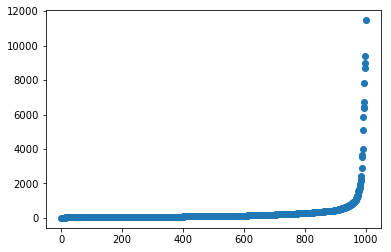

In [42]:
recent.sort_values(by="permitamount", inplace=True)
recent.reset_index(inplace=True)
plt.scatter(recent.index, recent.permitamount)

In [154]:
help(df.groupby(df.permittype))

Help on DataFrameGroupBy in module pandas.core.groupby object:

class DataFrameGroupBy(NDFrameGroupBy)
 |  Class for grouping and aggregating relational data. See aggregate,
 |  transform, and apply functions on this object.
 |  
 |  It's easiest to use obj.groupby(...) to use GroupBy, but you can also do:
 |  
 |  ::
 |  
 |      grouped = groupby(obj, ...)
 |  
 |  Parameters
 |  ----------
 |  obj : pandas object
 |  axis : int, default 0
 |  level : int, default None
 |      Level of MultiIndex
 |  groupings : list of Grouping objects
 |      Most users should ignore this
 |  exclusions : array-like, optional
 |      List of columns to exclude
 |  name : string
 |      Most users should ignore this
 |  
 |  Notes
 |  -----
 |  After grouping, see aggregate, apply, and transform functions. Here are
 |  some other brief notes about usage. When grouping by multiple groups, the
 |  result index will be a MultiIndex (hierarchical) by default.
 |  
 |  Iteration produces (key, group) tup

Use Python's `del` syntax to remove columns.

In [238]:
del recent["file"]

In [ ]:
import pytz

In [90]:
permits[["address"]] = permits.address.str.upper()

In [8]:
permits.status.map({"Issued": 123})

0      123.0
1      123.0
2      123.0
3      123.0
4      123.0
5      123.0
6      123.0
7      123.0
8      123.0
9      123.0
10     123.0
11     123.0
12     123.0
13     123.0
14     123.0
15       NaN
16     123.0
17     123.0
18     123.0
19     123.0
20     123.0
21     123.0
22     123.0
23     123.0
24     123.0
25     123.0
26     123.0
27     123.0
28     123.0
29     123.0
       ...  
970    123.0
971    123.0
972    123.0
973    123.0
974    123.0
975    123.0
976    123.0
977    123.0
978    123.0
979    123.0
980    123.0
981    123.0
982    123.0
983    123.0
984    123.0
985    123.0
986    123.0
987    123.0
988    123.0
989    123.0
990    123.0
991    123.0
992    123.0
993    123.0
994    123.0
995    123.0
996    123.0
997    123.0
998    123.0
999    123.0
Name: status, dtype: float64

In [14]:
permits[permits.amountpaid <= permits.status.map({"Issued": 123})]

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status
0,23 MOUNT VERNON ST,100.0,granville newton,23mount vernon street,somerville ma 02145,2017-09-11,NaN,NaT,17-016797,2017-09-11T00:00:00,42.385448,-71.079521,DP17-000178,100.0,Dumpster Permit,Dumpster,dumpster on the street,Issued
1,46 WARE ST,100.0,Steven Hiou,2 Neptune Rd #140,East Boston MA 02151,2017-09-11,NaN,NaT,17-016869,2017-09-11T00:00:00,42.405514,-71.128281,DP17-000179,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
2,10 MONTGOMERY AVE,60.0,"Aquaflow plumbing and heating, inc",11 golden hills rd,"saugus, ma, 01906",2017-09-08,NaN,2018-03-08,17-016663,2017-09-08T00:00:00,42.390377,-71.090111,P17-000812,60.0,Residential - Existing,Plumbing,Sink Removal Basement,Issued
4,81 SACRAMENTO ST,60.0,Pavidis Plumbing & Heating Inc.,24 Cross St,Somerville MA 02145,2017-09-08,NaN,2018-03-08,17-016666,2017-09-08T00:00:00,42.383160,-71.112610,G17-000647,60.0,Residential - Existing,Gas,Kitchen gas stove,Issued
5,430 MCGRATH HWY,60.0,Atlas Glen-mor,295 Eastern Ave,Chelsea MA 02150,2017-09-08,NaN,2018-03-11,17-016682,2017-09-11T00:00:00,42.382835,-71.091286,E17-001830,60.0,Residential,Electrical,Wire replacement oil boiler,Issued
6,105 BROADWAY,100.0,Rent-A-Center,105 Broadway,Somerville MA 02145,2017-09-08,NaN,NaT,17-016685,2017-09-08T00:00:00,42.387558,-71.083168,DP17-000177,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued
10,147 GLEN ST,60.0,Gonzalo Artigas,26 Vineyard St,Cambridge MA 02138,2017-09-07,NaN,2018-03-08,17-016556,2017-09-08T00:00:00,42.382938,-71.087631,G17-000645,60.0,Residential - Existing,Gas,Run gas for a combi boiler,Issued
12,45 MURDOCK ST,90.0,"Sparrow Electric, LLC",189 Broadway,Arlington MA 02474,2017-09-07,NaN,2018-03-08,17-016609,2017-09-08T00:00:00,42.395618,-71.108650,E17-001824,90.0,Residential,Electrical,Resecure siding,Issued
13,78 MOUNT VERNON ST R,45.0,Jason Hoover,1 Doherty Ave,Billerica MA 01821,2017-09-06,NaN,2018-03-06,17-016394,2017-09-06T00:00:00,42.382961,-71.081123,E17-001807,45.0,Residential,Electrical,Bath remodel,Issued
14,38 BERKELEY ST,100.0,Steven Hiou,2 Neptune Rd #140,East Boston MA 02151,2017-09-06,NaN,NaT,17-016412,2017-09-11T00:00:00,42.386238,-71.101982,DP17-000173,100.0,Dumpster Permit,Dumpster,dumpster on street,Issued


In [ ]:
permits["category"] = permits.permittype.map(lambda)

# Visualizations with Altair
Let's try visualizing the data. First, we'll need to install [Altair](https://altair-viz.github.io). Altair is a Python package that outputs a Vega specification. Vega is a declarative syntax for data visualizations built on top of D3, so you can load it in a web browser.

You can install altair directly within your Jupyter notebook using its bang (`!`) syntax. `!command arg1 arg2... argn` will run a shell command and print the results.

In [2]:
!conda install --yes -q altair --channel conda-forge

    100% |████████████████████████████████| 11.7MB 61kB/s  eta 0:00:01
    100% |████████████████████████████████| 1.2MB 604kB/s eta 0:00:01
  Running setup.py bdist_wheel for altair ... - \ | / done
  Stored in directory: /Users/brian/Library/Caches/pip/wheels/0e/21/03/3115d46f918d740adab3d882c27e6a1be0062ec98c77405a31
  Running setup.py bdist_wheel for vega ... - \ done
  Stored in directory: /Users/brian/Library/Caches/pip/wheels/2a/00/92/1ca8c4c7b412754fc005653a1e773106601fabe9679cf505ab
Successfully built altair vega


In [13]:
from altair import *

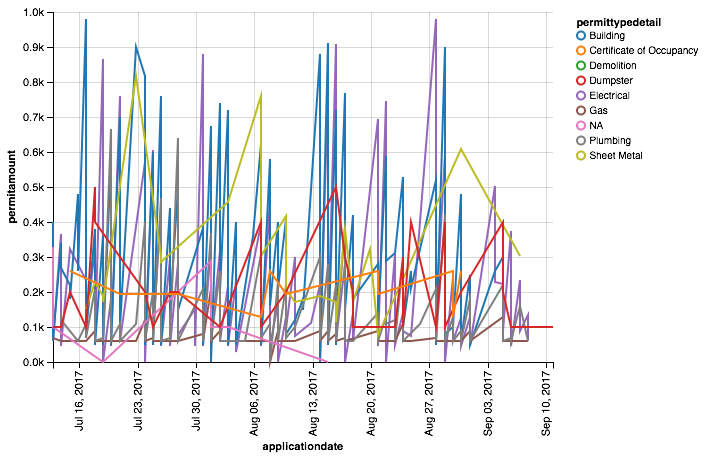

In [53]:
Chart(permits.sort_values("permitamount").query("permitamount < 1000")).mark_line().encode(
    x="applicationdate",
    y="permitamount",
    color="permittypedetail"
)

In [64]:
permit_max = int(permits.permitamount.max())
labels = [f"{i}-{i+1000}" for i in range(0, permit_max, 1000)]
permits["price_group"] = pd.cut(permits.permitamount, range(0, permit_max+1000, 1000), right=False, labels=labels)
    permits.sort_values("permitamount", ascending=False).head()

,address,amountpaid,applicant,applicantaddress,applicantcitystzip,applicationdate,closedate,expirationdate,file,issuedate,latitude,longitude,permit,permitamount,permittype,permittypedetail,projectname,status,price_group
674,200 INNER BELT RD,11470.0,"Architectural Environments, Inc",6 wesley st,Chelmsford MA 01824,2017-07-25,NaN,2018-02-14,17-013233,2017-08-14T00:00:00,42.390717,-71.101311,B17-001373,11470.0,Commercial Renovation,Building,"Build-out new final product freezer room, adja...",Issued,11000-12000
379,55 PEARSON AVE,9416.0,New England Design and Construction,103 Terrace Street,Boston Ma 02120,2017-08-13,NaN,2018-02-23,17-014719,2017-08-23T00:00:00,42.396481,-71.111534,B17-001507,9416.0,Residential Renovation,Building,Interior renovations on 3 floors and Exterior ...,Issued,9000-10000
792,20 CARLTON ST,9000.0,Brickstone Builders Corp,PO Box 229,E Walpole MA 02032,2017-07-19,NaN,2018-02-23,17-012865,2017-08-23T00:00:00,42.380688,-71.100021,B17-001330,9000.0,Residential Renovation,Building,complete renovation of existing 3 family for t...,Issued,9000-10000
368,40 PARK ST,8700.0,"IronWood Commercial Construction, Inc.",73 Summer St.,Malden MA 02148,2017-08-14,NaN,2018-03-06,17-014798,2017-09-06T00:00:00,42.381653,-71.106949,B17-001523,8700.0,Commercial Renovation,Building,"Paint, new flooring, add kitchenette, add 2 co...",Issued,8000-9000
634,14 TYLER ST,7830.0,enduro construction co. inc.,616 woburn st,wilmington ma 01887,2017-07-27,NaN,2018-03-03,17-013484,2017-08-31T00:00:00,42.381470,-71.104462,B17-001395,7830.0,Commercial Renovation,Building,increase in bathroom size for occupancy,Issued,7000-8000


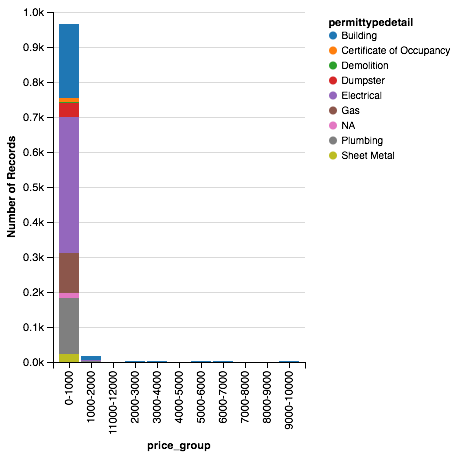

In [66]:
Chart(permits).mark_bar().encode(
x="price_group",
y=Y("*:Q", aggregate="count"),
color="permittypedetail")

In [74]:
permits.permitamount.quantile(0.90)

443.47500000000014

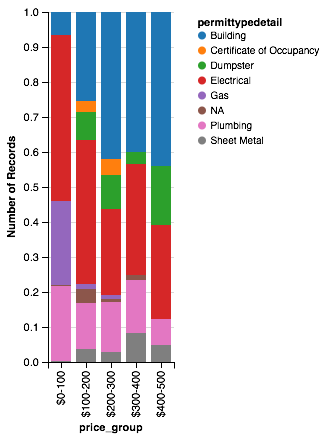

In [85]:
labels = [f"${i}-{i+100}" for i in range(0, 500, 100)]
permits["price_group"] = pd.cut(permits.permitamount, range(0, 600, 100), right=False, labels=labels)

Chart(permits.dropna(subset=["price_group"])).mark_bar(stacked="normalize").encode(
x="price_group",
y=Y("*:Q", aggregate="count"),
color="permittypedetail")